In [1]:
from models import Discriminator, Generator
from datasets import ImageDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
import torchvision
from skimage import io, morphology
import matplotlib.pyplot as plt
import numpy as np
from unet import UNet
from PIL import Image

In [12]:
# 83bd77482ae34178a5cb8113be67203b res_baseline


In [2]:
transforms_ = [
#     transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))]
ds = ImageDataset('datasets/cycledsa_v2/', transforms_=transforms_, unaligned=False)

In [4]:
netG_B2A = Generator(1, 1)
# netG_B2A = UNet(1,1)
checkpoint = torch.load('mlruns/0/83bd77482ae34178a5cb8113be67203b/last.ckpt', map_location='cpu')
netG_B2A.load_state_dict(checkpoint['netG_B2A'])

<All keys matched successfully>

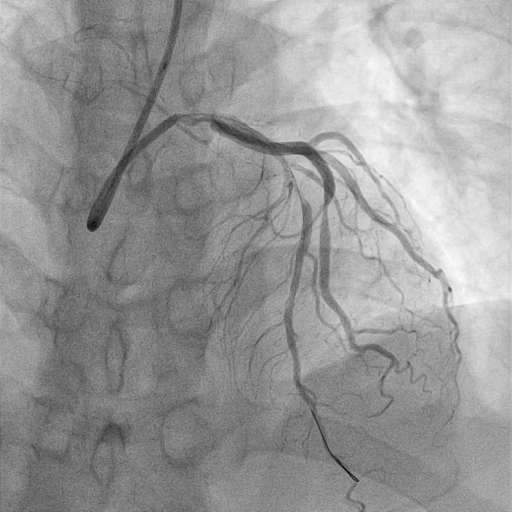

In [39]:
idx = 17
A = ds[idx]['A']
B = ds[idx]['B']
B_dnorm = torchvision.utils.make_grid(B,normalize=True)
transforms.ToPILImage()(B_dnorm)

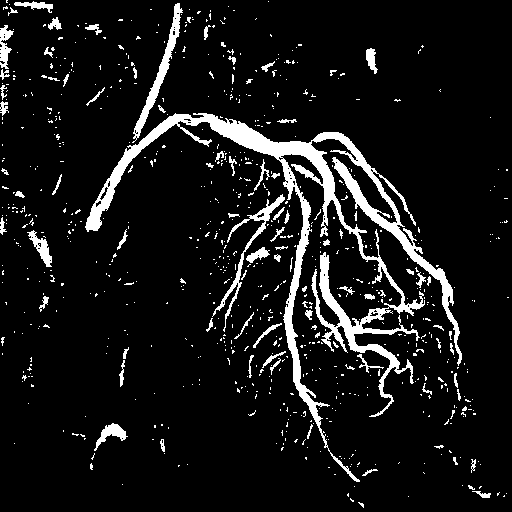

In [40]:
fakeA = netG_B2A.model(B.unsqueeze(0))
out = (fakeA[0]>0.04).float()
transforms.ToPILImage()(out)

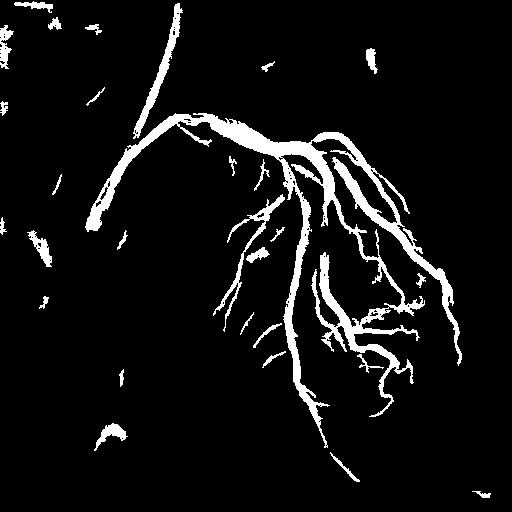

In [41]:
arr = out.numpy()[0]
cleaned = morphology.remove_small_objects(arr>0 , min_size=50)
Image.fromarray(cleaned)